In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
#Scaling and Splitting
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Evaluation
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

/kaggle/input/trailer-prices/trailerdata1.csv
/kaggle/input/trailer-prices/trailerdata2.csv


# About this notebook
This notebook aims to predict the price of a product (trailer) for an early stage start-up. The data has been anonymized. Due to the web infrastructure of other manufacturers of similar trailers, the data was collected by hand. This project is still on-going and updated regularly. 

## Current Challenges
Currently the challenge is to deal with the small amount of data. There are unfortunately not many data points availbale in general, but work is underway to fill in vital details of partially filled entries to increase the entries which actually get used in ML modeling. 

In [2]:
#The trailer price data is saved in a csv file and must first be loaded
data = pd.read_csv('/kaggle/input/trailer-prices/trailerdata1.csv', sep=';')
data.tail(15)

,total dry weight,length,exterior width,exterior height,interior height,Driver Side Window,Driver Side Door,Driver Side Door Window,Passenger Side Door,Passenger Side Door Window,Passenger Side Window,Rear Door,Rear Door Window,Diamond Plate,Spare Tire,Battery Power Supply,Awning,price
29,1100.0,156,80.0,80.5,58.0,yes,no,no,yes,yes,yes,no,no,no,yes,yes,no,9991
30,1350.0,156,80.0,80.5,58.0,yes,no,no,yes,yes,yes,no,no,no,yes,yes,no,16997
31,1100.0,156,80.0,69.0,44.0,yes,no,no,yes,yes,yes,no,no,no,yes,yes,option,15991
32,1400.0,156,80.0,80.5,58.0,yes,no,no,yes,yes,yes,no,no,no,yes,yes,option,19991
33,800.0,144,80.0,68.0,44.0,no,yes,no,yes,no,no,yes,no,yes,yes,yes,yes,9999
34,800.0,144,80.0,68.0,44.0,no,yes,no,yes,no,no,yes,no,yes,yes,yes,yes,10499
35,900.0,156,80.0,68.0,44.0,no,yes,no,yes,no,no,yes,no,yes,yes,yes,yes,11499
36,1000.0,168,80.0,68.0,44.0,no,yes,yes,yes,no,yes,yes,no,yes,yes,yes,yes,12499
37,1000.0,147,81.0,71.0,44.0,no,yes,yes,yes,no,yes,yes,no,yes,yes,yes,yes,13499
38,1100.0,159,81.0,71.0,44.0,no,yes,yes,yes,no,yes,yes,no,yes,yes,yes,yes,14499


In [3]:
#inspect the data types of each column
#for modeling everything needs to be and int or float
data.dtypes

total dry weight              float64
length                          int64
exterior width                float64
exterior height               float64
interior height               float64
Driver Side Window             object
Driver Side Door               object
Driver Side Door Window        object
Passenger Side Door            object
Passenger Side Door Window     object
Passenger Side Window          object
Rear Door                      object
Rear Door Window               object
Diamond Plate                  object
Spare Tire                     object
Battery Power Supply           object
Awning                         object
price                           int64
dtype: object

In [4]:
#checking for missing values
#missing values must be dealt with for ML modeling
data.isna().sum()

total dry weight              0
length                        0
exterior width                0
exterior height               0
interior height               0
Driver Side Window            0
Driver Side Door              0
Driver Side Door Window       0
Passenger Side Door           0
Passenger Side Door Window    0
Passenger Side Window         0
Rear Door                     0
Rear Door Window              0
Diamond Plate                 0
Spare Tire                    0
Battery Power Supply          0
Awning                        0
price                         0
dtype: int64

In [5]:
#drop columns which contain many empty values that are unlikely to be helpful in calculations
#data.drop(['model', 'year', 'sleeps', 'aluminum siding (inch)', 'A/C', 'msrp'], axis=1)

In [6]:
#43 is the target
data2=data.drop(data.index[[43]])

In [7]:
data2

,total dry weight,length,exterior width,exterior height,interior height,Driver Side Window,Driver Side Door,Driver Side Door Window,Passenger Side Door,Passenger Side Door Window,Passenger Side Window,Rear Door,Rear Door Window,Diamond Plate,Spare Tire,Battery Power Supply,Awning,price
0,1660.0,198,102.0,84.0,54.0,yes,no,no,yes,yes,yes,no,no,yes,yes,no,option,14879
1,2260.0,194,102.0,108.0,74.0,yes,no,no,yes,yes,yes,no,no,yes,yes,no,no,18489
2,1320.0,144,102.0,90.0,54.0,yes,no,no,yes,yes,yes,no,no,yes,yes,no,option,12500
3,1320.0,144,102.0,90.0,54.0,yes,no,no,yes,yes,yes,no,no,yes,yes,no,option,14997
4,1930.0,185,102.0,105.0,73.0,yes,no,no,yes,yes,yes,no,no,yes,yes,no,option,15965
5,2260.0,188,102.0,108.0,74.0,yes,no,no,yes,yes,yes,no,no,yes,yes,no,no,18689
6,720.0,144,48.0,64.0,46.0,yes,yes,no,no,no,yes,no,no,no,no,no,option,5500
7,820.0,144,60.0,64.0,46.0,yes,no,no,yes,yes,no,no,no,no,no,no,option,6500
8,820.0,144,60.0,64.0,46.0,yes,yes,no,yes,no,yes,no,no,no,no,no,no,6999
9,999.0,144,60.0,64.0,46.0,yes,yes,no,yes,no,yes,no,no,no,no,no,no,7999


In [8]:
data2.isna().sum()

total dry weight              0
length                        0
exterior width                0
exterior height               0
interior height               0
Driver Side Window            0
Driver Side Door              0
Driver Side Door Window       0
Passenger Side Door           0
Passenger Side Door Window    0
Passenger Side Window         0
Rear Door                     0
Rear Door Window              0
Diamond Plate                 0
Spare Tire                    0
Battery Power Supply          0
Awning                        0
price                         0
dtype: int64

In [9]:
data2.shape

(43, 18)

In [10]:
#these columns will be renamed to remove the space in the heading 
data2 = data2.rename(columns={"exterior height": "eheight", "total dry weight": "tdweight", "interior height":"intheight"})

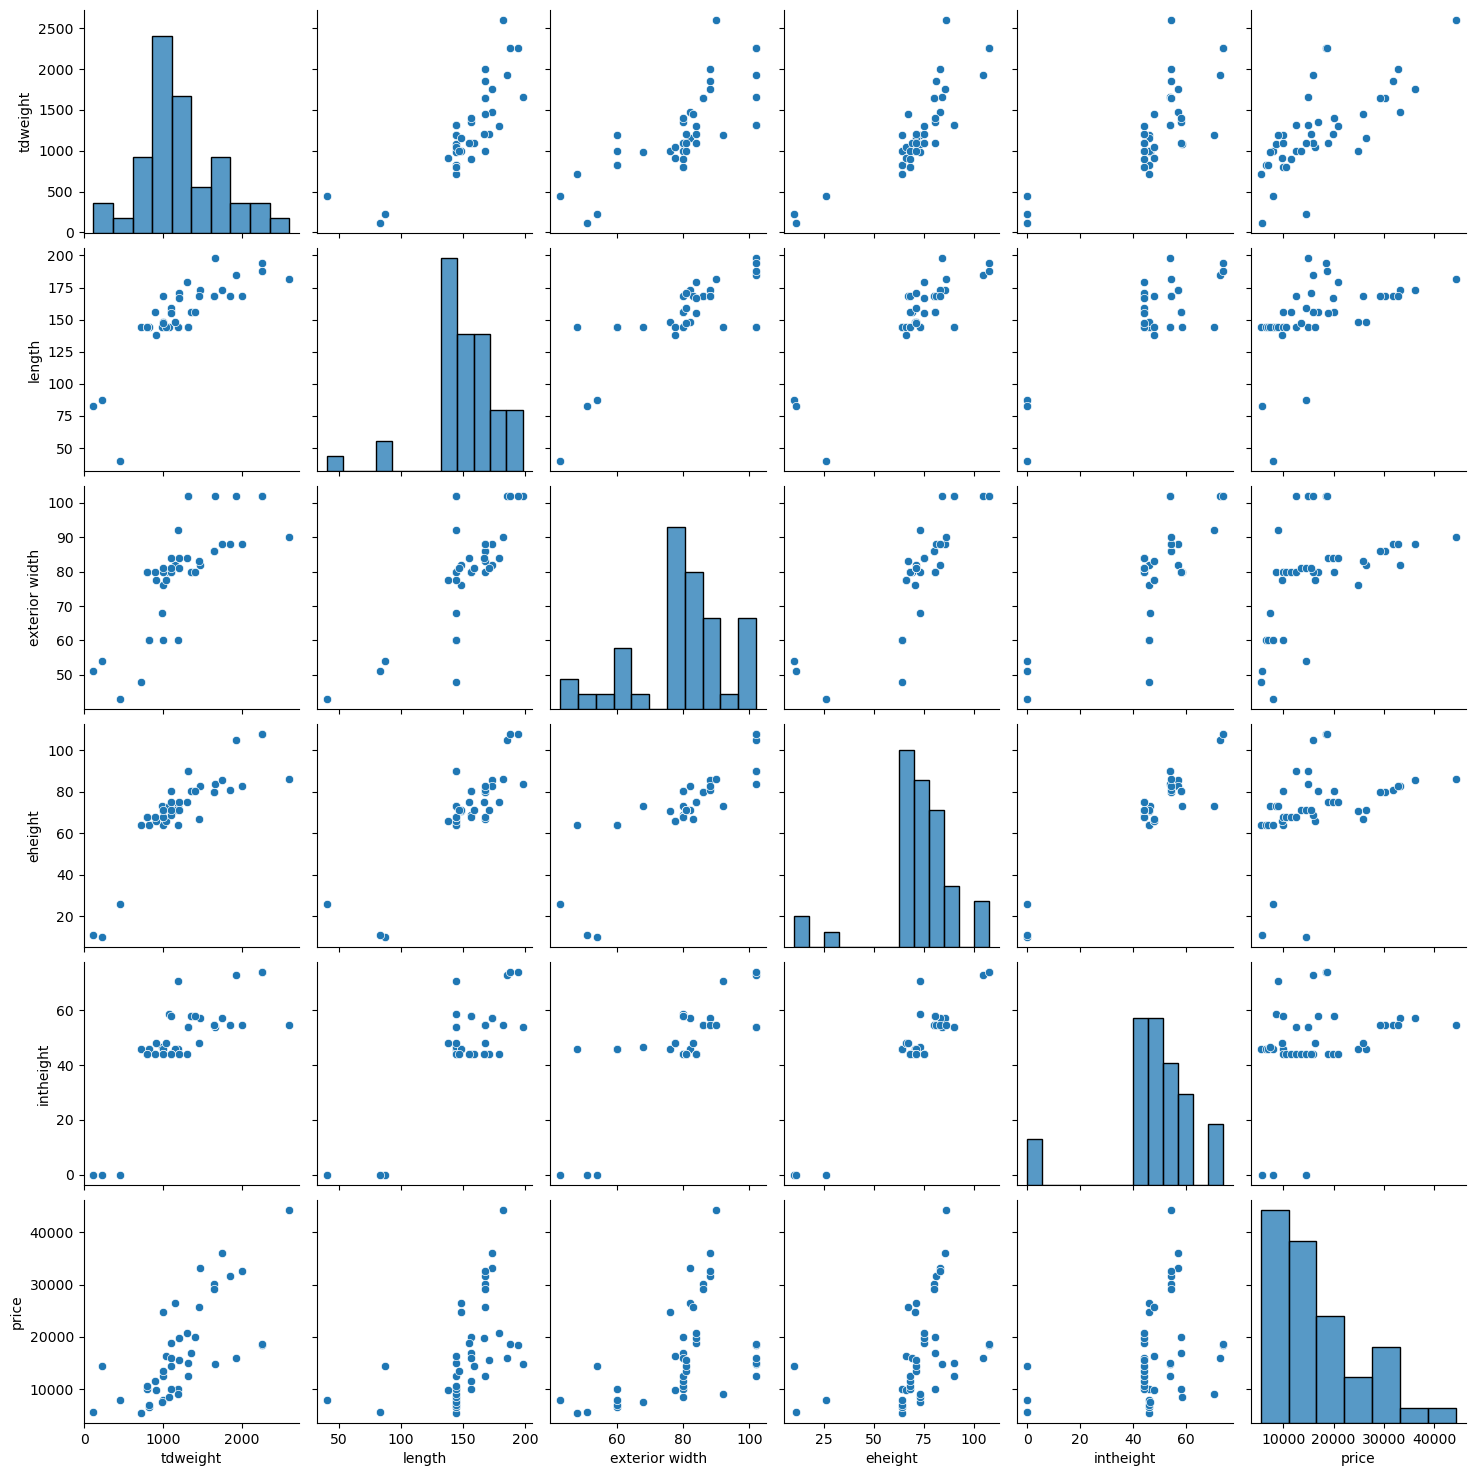

In [11]:
sns.pairplot(data2)

Of all the variables, total dry weight appears to be the most correlated with the price. Let's look at it a bit more closely. 

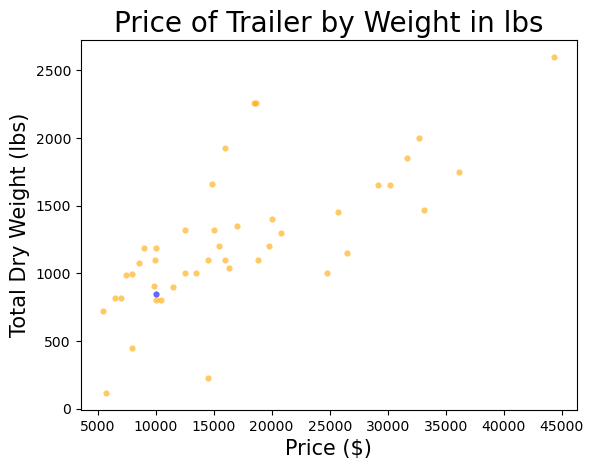

In [12]:
# values of x
x=data['price']
y= data['total dry weight']

col = []
  
for i in range(0, len(x)):
    if x[i]==9995:
        col.append('blue')  
    else:
        col.append('orange') 
  
for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 20,
                linewidth = 0, alpha=0.6)
    plt.title("Price of Trailer by Weight in lbs", fontsize=20)
    plt.ylabel("Total Dry Weight (lbs)", fontsize=15)
    plt.xlabel("Price ($)", fontsize=15)
      
plt.show()

There are still 3 missing values, but it is missing because these trailers are small than all the others and actually don't have an interior to have an interior height. Therefore it makes the most sense to fill them all in with 0, as they must contain some number for modeling. 

In [13]:
#select the categorical data for encoding
cat_data = data2.iloc[:, 5:17]
cat_data

,Driver Side Window,Driver Side Door,Driver Side Door Window,Passenger Side Door,Passenger Side Door Window,Passenger Side Window,Rear Door,Rear Door Window,Diamond Plate,Spare Tire,Battery Power Supply,Awning
0,yes,no,no,yes,yes,yes,no,no,yes,yes,no,option
1,yes,no,no,yes,yes,yes,no,no,yes,yes,no,no
2,yes,no,no,yes,yes,yes,no,no,yes,yes,no,option
3,yes,no,no,yes,yes,yes,no,no,yes,yes,no,option
4,yes,no,no,yes,yes,yes,no,no,yes,yes,no,option
5,yes,no,no,yes,yes,yes,no,no,yes,yes,no,no
6,yes,yes,no,no,no,yes,no,no,no,no,no,option
7,yes,no,no,yes,yes,no,no,no,no,no,no,option
8,yes,yes,no,yes,no,yes,no,no,no,no,no,no
9,yes,yes,no,yes,no,yes,no,no,no,no,no,no


In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

#label encode the data to prepare for modeling
#label encoding is preferred for categorical variables

for col in cat_data:
    data2[col] = labelencoder.fit_transform(data2[col])
 
data2.head()

,tdweight,length,exterior width,eheight,intheight,Driver Side Window,Driver Side Door,Driver Side Door Window,Passenger Side Door,Passenger Side Door Window,Passenger Side Window,Rear Door,Rear Door Window,Diamond Plate,Spare Tire,Battery Power Supply,Awning,price
0,1660.0,198,102.0,84.0,54.0,1,0,0,1,1,1,0,0,1,2,0,1,14879
1,2260.0,194,102.0,108.0,74.0,1,0,0,1,1,1,0,0,1,2,0,0,18489
2,1320.0,144,102.0,90.0,54.0,1,0,0,1,1,1,0,0,1,2,0,1,12500
3,1320.0,144,102.0,90.0,54.0,1,0,0,1,1,1,0,0,1,2,0,1,14997
4,1930.0,185,102.0,105.0,73.0,1,0,0,1,1,1,0,0,1,2,0,1,15965


In [15]:
corr=data2.corr()
corr

,tdweight,length,exterior width,eheight,intheight,Driver Side Window,Driver Side Door,Driver Side Door Window,Passenger Side Door,Passenger Side Door Window,Passenger Side Window,Rear Door,Rear Door Window,Diamond Plate,Spare Tire,Battery Power Supply,Awning,price
tdweight,1.000000,0.782572,0.755302,0.830027,0.755497,0.430651,0.001397,0.264815,0.546815,0.618320,0.437731,0.123354,NaN,0.069709,0.442700,0.125641,0.004953,0.704032
length,0.782572,1.000000,0.747441,0.852388,0.824974,0.354465,0.194714,0.296595,0.737725,0.526353,0.461281,0.251620,NaN,0.267820,0.439293,0.217330,0.320720,0.482032
exterior width,0.755302,0.747441,1.000000,0.827325,0.744735,0.261056,-0.082406,0.246147,0.673633,0.633468,0.367678,0.206182,NaN,0.431473,0.644236,0.155856,0.267238,0.453700
eheight,0.830027,0.852388,0.827325,1.000000,0.939333,0.443111,0.016147,0.124984,0.746788,0.566671,0.475855,0.100185,NaN,0.233384,0.432587,0.075084,0.153716,0.391353
intheight,0.755497,0.824974,0.744735,0.939333,1.000000,0.507157,0.084600,0.115436,0.750703,0.527109,0.495711,0.111549,NaN,0.055273,0.251515,-0.004176,0.014006,0.294719
Driver Side Window,0.430651,0.354465,0.261056,0.443111,0.507157,1.000000,-0.165025,-0.148094,0.290066,0.428633,0.730087,-0.218465,NaN,-0.512589,0.011321,-0.181848,-0.339264,0.016979
Driver Side Door,0.001397,0.194714,-0.082406,0.016147,0.084600,-0.165025,1.000000,0.647912,0.290066,-0.196154,0.047614,0.780897,NaN,-0.016163,-0.110377,0.357426,0.410605,0.252023
Driver Side Door Window,0.264815,0.296595,0.246147,0.124984,0.115436,-0.148094,0.647912,1.000000,0.298641,0.389038,0.119286,0.735815,NaN,0.114968,0.295136,0.540802,0.473626,0.620793
Passenger Side Door,0.546815,0.737725,0.673633,0.746788,0.750703,0.290066,0.290066,0.298641,1.000000,0.437553,0.362732,0.359937,NaN,0.152722,0.369828,0.301459,0.299234,0.303619
Passenger Side Door Window,0.618320,0.526353,0.633468,0.566671,0.527109,0.428633,-0.196154,0.389038,0.437553,1.000000,0.241873,0.036561,NaN,0.031782,0.456349,0.198520,0.063907,0.583022


<AxesSubplot:>

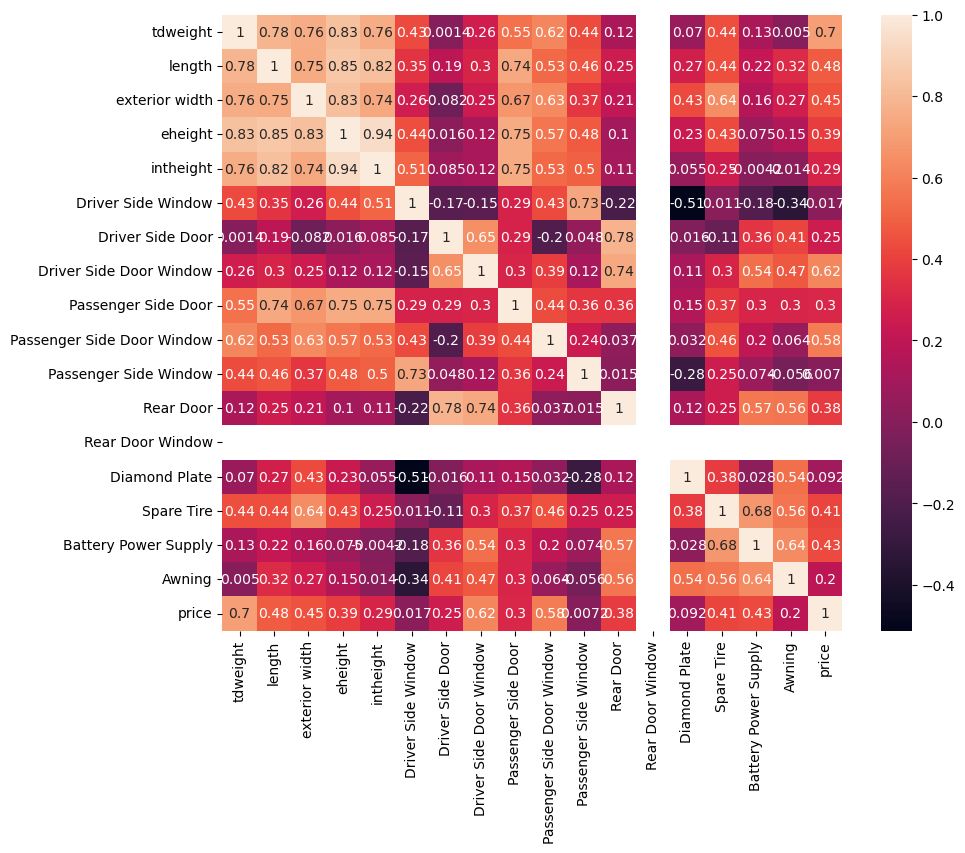

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

# Machine Learning Modeling
The data is now clean and we can move forward with creating some machine learning models. Once we settle on the best model it can be used to predict the target price of the trailer in question.

Replace "option" with "no" and try modeling again

In [17]:
#here the data is split up into X,y where X contains everything but price and y contains what we want to predict (price)
#price is what we want to predict
X = data2.drop(['price'],axis=1)
y=data2['price']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [19]:
#scaling the data
#this usually helps with modeling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#function which runs different ML models and prints R^2, MAE and RMSE
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

Now the data is all cleaned up and ready for creating some machine learning models. A funtion has been written to run various models and output metrics 

In [21]:
model_1 = LinearRegression()
run_experiment(model_1)

R^2 :  0.18556490002534254
MAE : 4634.489037897799
RMSE: 6761.292633928076


In [22]:
model_2 = DecisionTreeRegressor(random_state = 1)
run_experiment(model_2)

R^2 :  0.6649002402494449
MAE : 3489.818181818182
RMSE: 4336.991290577542


In [23]:
model_3 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)
run_experiment(model_3)

R^2 :  0.4149345006672651
MAE : 4246.5078909821905
RMSE: 5730.648041641566


In [24]:
model_4 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_4)

R^2 :  -0.16590051134503825
MAE : 5940.276998498989
RMSE: 8089.696679045299


In [25]:
model_5 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_5)

R^2 :  0.3174022061342274
MAE : 4582.550543285226
RMSE: 6189.904262145119


In [26]:
model_6 = LassoLars(alpha=.1)
run_experiment(model_6)

R^2 :  0.1885857896217512
MAE : 4633.480678117234
RMSE: 6748.741545501833


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [27]:
model_7 = BayesianRidge()
run_experiment(model_7)

R^2 :  0.34152407759729386
MAE : 4607.542274402534
RMSE: 6079.550096108261


In [28]:
model_8 = SGDRegressor(max_iter=1000, tol=1e-3)
run_experiment(model_8)

R^2 :  0.3286313898008514
MAE : 4668.831752480927
RMSE: 6138.779126984723


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [29]:
model_9 = SVR(epsilon=0.2)
run_experiment(model_9)

R^2 :  -0.1699900259436704
MAE : 5557.342290937487
RMSE: 8103.871976455109


In [30]:
model_10 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_10)

R^2 :  0.7841810605039865
MAE : 2697.900035484716
RMSE: 3480.5371117386508


Unsurprisingly, RandomForest preformed better than all the other models tested. Therefore we will move forward with tuning hyperparameters to figure out which produce the best result.

## Hyperparameter Tuning
Perhaps it is a bit early to get into hyperparameter tuning, but nonetheless the code is ready for once the dataset has been expanded :) Commented out for time saving purposes.

In [31]:
rfc=RandomForestRegressor(random_state=1)

In [32]:
#param_grid = { 
    #'n_estimators': [100, 500, 1000, 5000],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #to save time in updating the notebook, max_depth is also left out
    #'max_depth' : [5, 10, 15],
    #'min_samples_leaf' : [1,2,3,5],
    #'criterion' :['squared_error', 'absolute_error', 'friedman_mse']
#}


In [33]:
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
#CV_rfc.fit(X_train_scaled, y_train)

In [34]:
#print the best parameters determined in GridSearchCV
#CV_rfc.best_params_

In [35]:
#run a final model using the optimal parameters
final_model = RandomForestRegressor(n_estimators=5000, max_features='sqrt', max_depth=10, min_samples_leaf=1, random_state=1)
run_experiment(final_model)

R^2 :  0.8346559254525194
MAE : 2642.6401515151524
RMSE: 3046.4623106529066


# Checking the value of interest

In [36]:
#this section must be approached differently with the addition of categorical data...

# Notes on the metrics used
✔️ Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂𝑖|
1
n
∑
i
=
1
n
|
y
i
−
y
^
i
|
 

 
Mean Squared Error (MSE) is the mean of the squared errors:
1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂𝑖)2
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂𝑖)2‾‾‾‾‾‾‾‾‾‾‾‾‾‾⎷
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
 
📌 Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm?scriptVersionId=117768677&cellId=36

<iframe src="https://www.kaggle.com/embed/faressayah/practical-introduction-to-10-regression-algorithm?cellIds=36&kernelSessionId=117768677" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Practical Introduction to 10 Regression Algorithm"></iframe>